**CAR PRICE PREDICTION**

**Problem Statement**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


**Business Goal**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#import warnings
#warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Reading and Understanding the Data**

Let's start with the following steps:

* Importing data using the pandas library
* Understanding the data

In [2]:
file_path='../input/car-price-prediction/CarPrice_Assignment.csv'
cars = pd.read_csv(file_path, index_col='car_ID')
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 25)

In [4]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
cars.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Find out if there are null fields

In [7]:
cars.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Step 2 : Data Cleaning and Preparation**

In [8]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x: x.split(' ')[0]) 
cars.insert(2,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Fixing invalid values**
There seems to be some spelling error in the CompanyName column.

* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [10]:
cars.CompanyName = cars.CompanyName.str.lower()

cars.CompanyName.replace('maxda','mazda',inplace=True)
cars.CompanyName.replace('porcshce','porsche',inplace=True)
cars.CompanyName.replace('toyouta','toyota',inplace=True)
cars.CompanyName.replace('vokswagen','volkswagen',inplace=True)
cars.CompanyName.replace('vw','volkswagen',inplace=True)

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,


**Step 3: Visualizing the data**

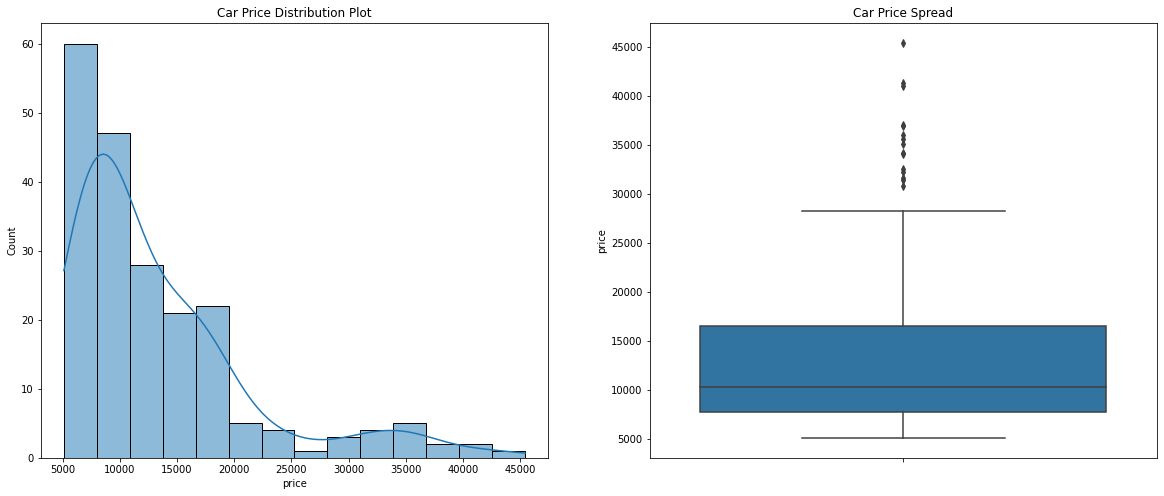

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(cars.price,kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [13]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


**Data Inferences :**
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

**Step 3.1 : Visualising Categorical Data**

In [14]:
categorical_cols=[cname for cname in cars.columns if cars[cname].dtype=='object' or cars[cname].nunique() <10]
print(categorical_cols)

['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


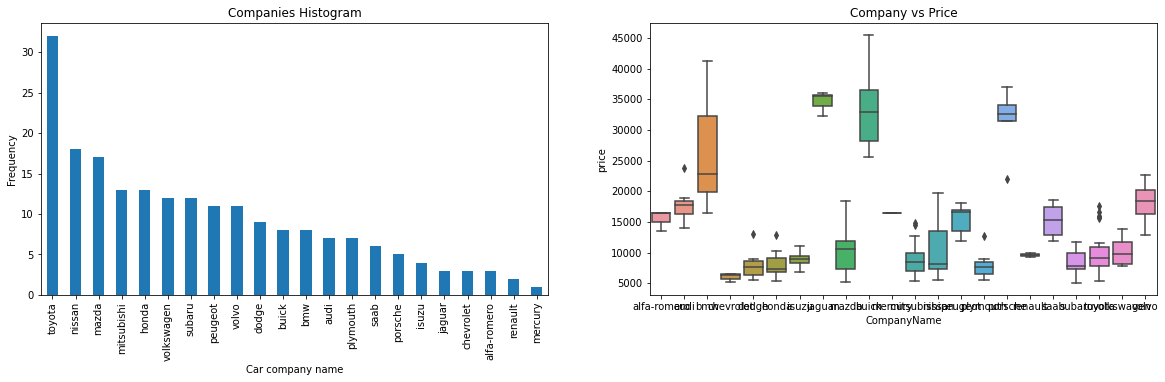

In [15]:
#Visualising Company Names
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company name', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Company vs Price')
sns.boxplot(x=cars.CompanyName, y=cars.price)


plt.show()

<Figure size 1440x360 with 0 Axes>

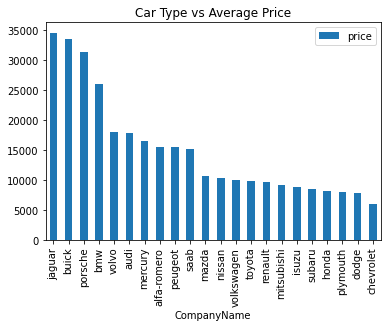

In [16]:
plt.figure(figsize=(20,5))
df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inferences:
* 'Toyota' is the most prefered car company and 'Mercury' is the least prefered one
* On an average, 'Jaguar' is the most expensive car and 'Chevrolet' is the least expensive car

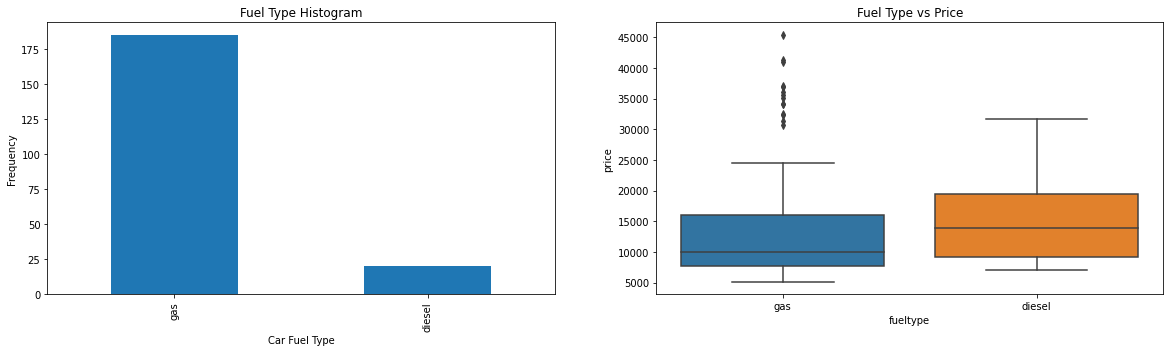

In [17]:
#Visualizing Fuel Type
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Car Fuel Type', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=cars.fueltype, y=cars.price)


plt.show()

Inferences:
* Most cars use gas as a fuel 
* Cars using gas as fuel have slightly lower price range as compared to cars with diesel as fuel, with few exceptions

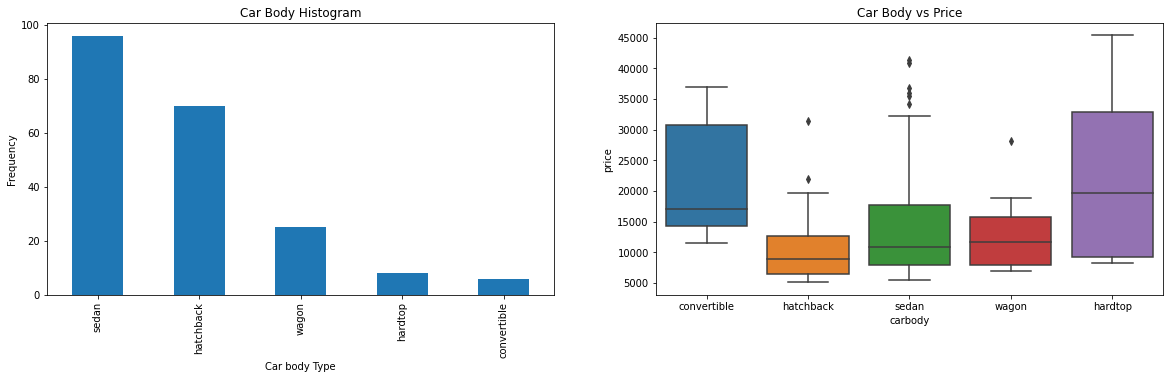

In [18]:
#Visualizing Car Body
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Body Histogram')
plt1.set(xlabel = 'Car body Type', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Car Body vs Price')
sns.boxplot(x=cars.carbody, y=cars.price)


plt.show()

Inferences:
* Most of the cars are 'Sedan'.
* 'Convertibles' and 'Hardtops' have high variation in their prices

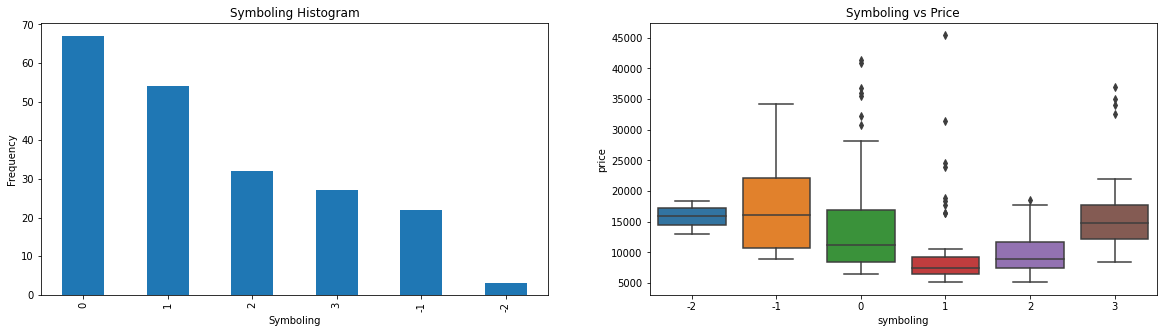

In [19]:
#Visualizing Symboling(Insurance risk rating)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.symboling.value_counts().plot(kind='bar')
plt.title('Symboling Histogram')
plt1.set(xlabel = 'Symboling', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price)


plt.show()

<Figure size 1440x360 with 0 Axes>

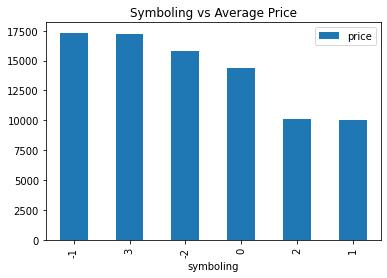

In [20]:
plt.figure(figsize=(20,5))
df = pd.DataFrame(cars.groupby(['symboling'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Symboling vs Average Price')
plt.show()

Inferences:
* Cars with 0 symboling are most prefered while with -2 symboling are hardly prefered.
* Cars with -1 symboling have the highest price range and highest price on an average

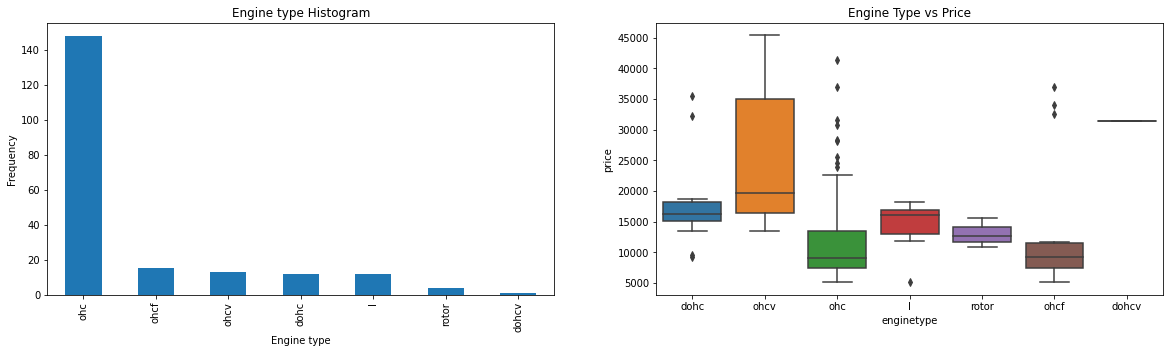

In [21]:
#Visualizing Engine Type
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.enginetype.value_counts().plot(kind='bar')
plt.title('Engine type Histogram')
plt1.set(xlabel = 'Engine type', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price)


plt.show()

<Figure size 1440x360 with 0 Axes>

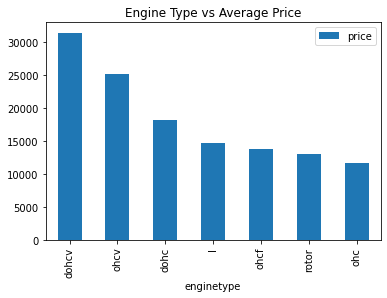

In [22]:
plt.figure(figsize=(20,5))
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Engine Type vs Average Price')
plt.show()

Inferences:
* 'ohc' engine type is highly prefered in cars and 'dohcv' is present in almost none of the cars.
* 'ohc' car is a low priced car but has a high variation in the prices.
* 'ohcv' which is the third most prefered engin has a very high variation in prices and is also the most expensive of all.

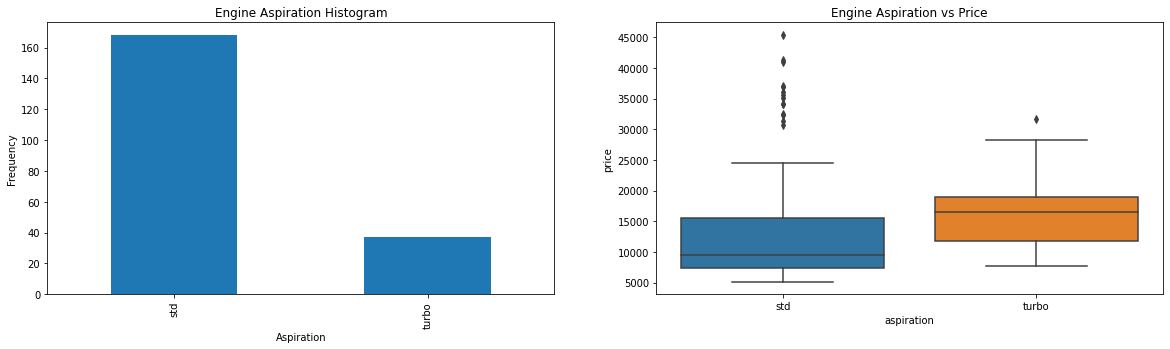

In [23]:
#Visualizing Engine aspiration
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.aspiration.value_counts().plot(kind='bar')
plt.title('Engine Aspiration Histogram')
plt1.set(xlabel = 'Aspiration', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Engine Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price)


plt.show()

Inferences:
* Cars with standard aspired engines are more prefered.
* Cars with turbocharged enigine are slighlty more priced than standard engines.

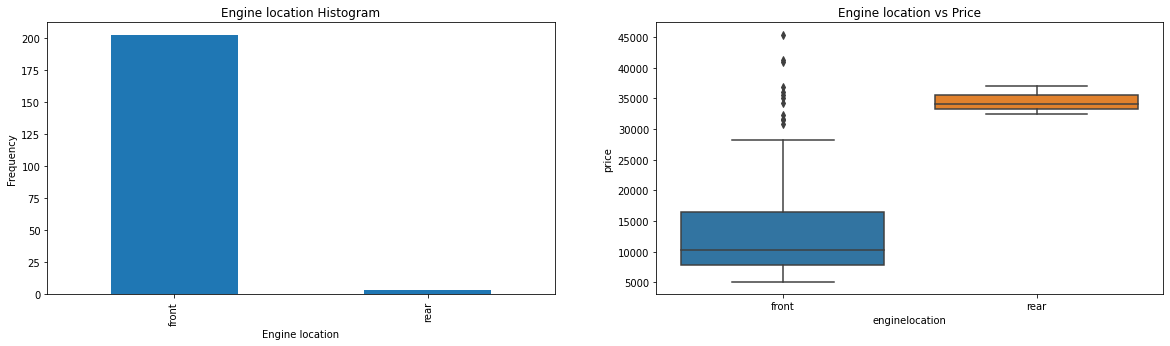

In [24]:
#Visualizing Engine Location
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.enginelocation.value_counts().plot(kind='bar')
plt.title('Engine location Histogram')
plt1.set(xlabel = 'Engine location', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Engine location vs Price')
sns.boxplot(x=cars.enginelocation, y=cars.price)


plt.show()

Inferences:
* Most cars have their engines in front but the cars with the engine in rear, though very small in number, have high prices.

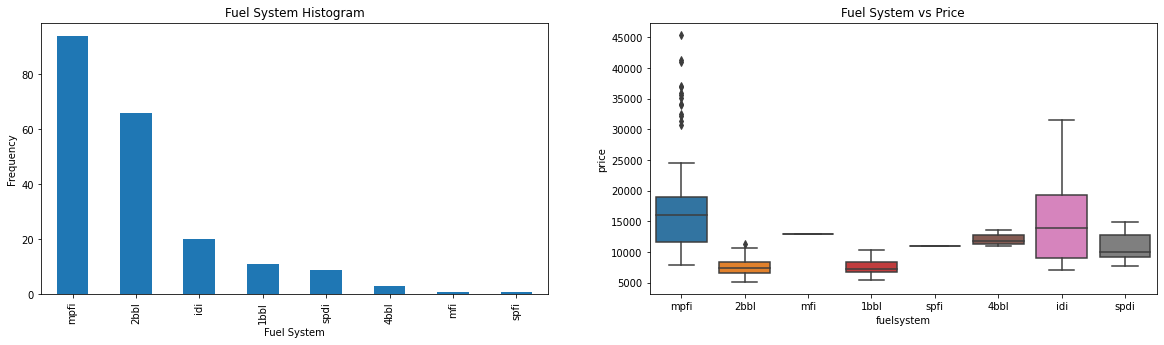

In [25]:
#Visualizing fuel system
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.fuelsystem.value_counts().plot(kind='bar')
plt.title('Fuel System Histogram')
plt1.set(xlabel = 'Fuel System', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Fuel System vs Price')
sns.boxplot(x=cars.fuelsystem, y=cars.price)


plt.show()

<Figure size 1440x360 with 0 Axes>

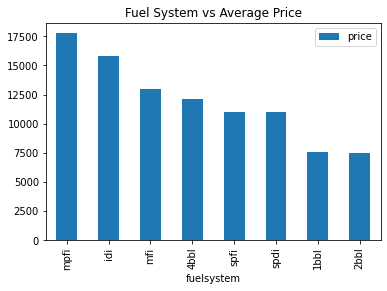

In [26]:
plt.figure(figsize=(20,5))
df = pd.DataFrame(cars.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel System vs Average Price')
plt.show()

Inferences:
* 'mpfi' fuel system is the most prefered in cars and cars with this fuel systme have the highest prices on an average.
* '2bbl' is second most prefered but cars with this fuel systme have the lowest prices on an average.

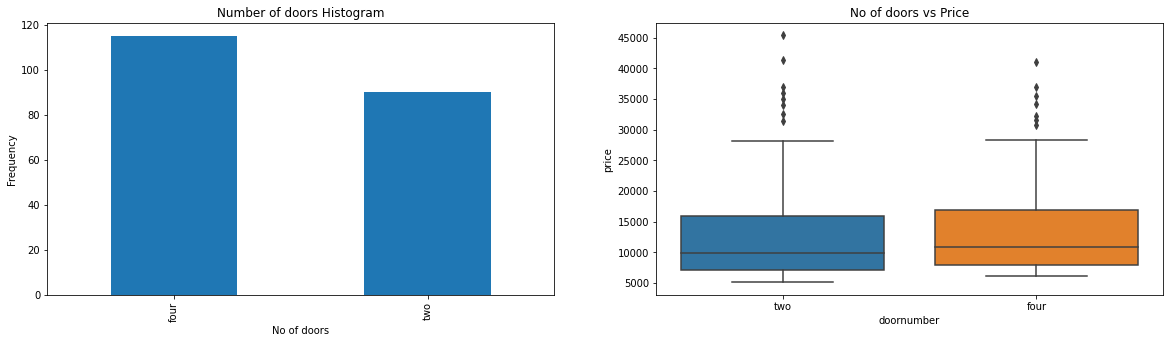

In [27]:
#Visualizing Door number
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.doornumber.value_counts().plot(kind='bar')
plt.title('Number of doors Histogram')
plt1.set(xlabel = 'No of doors', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('No of doors vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price)


plt.show()

Inferences:
* There is so significant effect of number of doors in a car to its price.
* Car with 2 and 4 doors are almost equally prefered with a slight preference to 4 doors
    

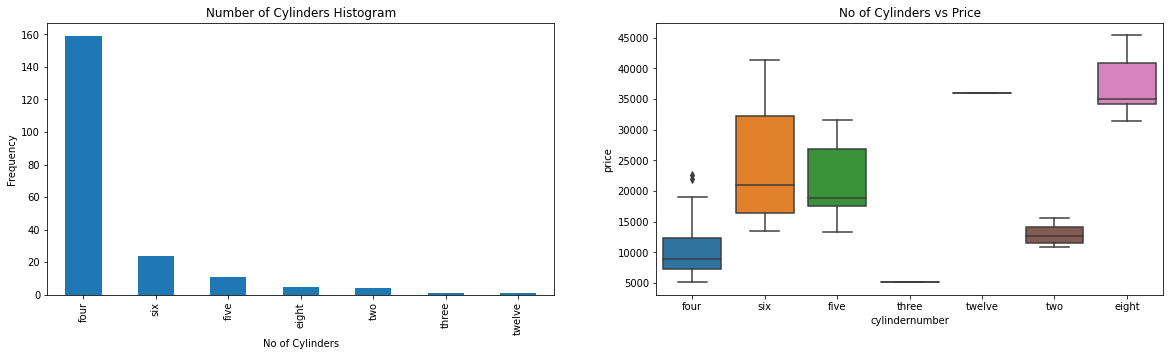

In [28]:
#Visualizing Cylinder number
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.cylindernumber.value_counts().plot(kind='bar')
plt.title('Number of Cylinders Histogram')
plt1.set(xlabel = 'No of Cylinders', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('No of Cylinders vs Price')
sns.boxplot(x=cars.cylindernumber, y=cars.price)


plt.show()

Inferences:
* Most of the cars have 4 cylinders but have lower prices
* Only one car has 3 cylinders 
* Only one car has 12 cylinders and is highly priced.
* Cars with 8 cylinders are the most expensive.


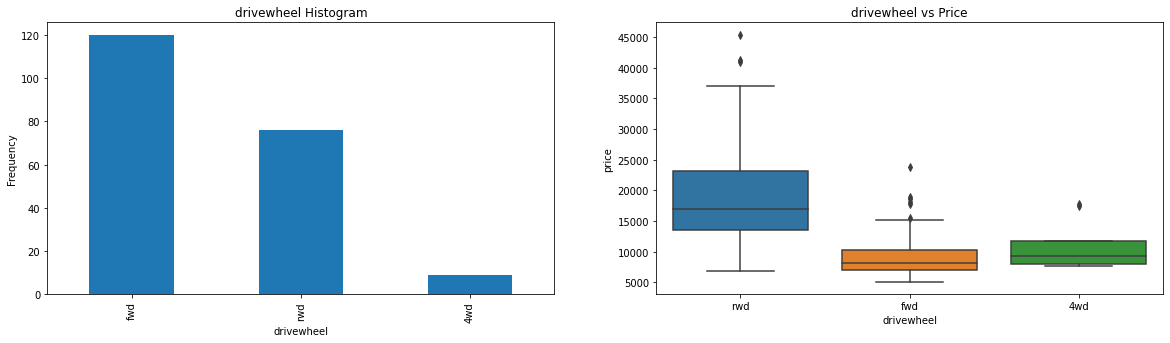

In [29]:
#Visualizing drivewheel
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt1 = cars.drivewheel.value_counts().plot(kind='bar')
plt.title('drivewheel Histogram')
plt1.set(xlabel = 'drivewheel', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('drivewheel vs Price')
sns.boxplot(x=cars.drivewheel, y=cars.price)


plt.show()

Inferences:
* Most cars have Front wheel drive 
* Cars with rear wheel drive have the highest price range.
* Four wheel drive cars are rare and have lower price range.

**Step 3.2 : Visualising numerical data**

In [30]:
cars.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [31]:
cars.dtypes

symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

**Step 3.2 : Visualising numerical data**

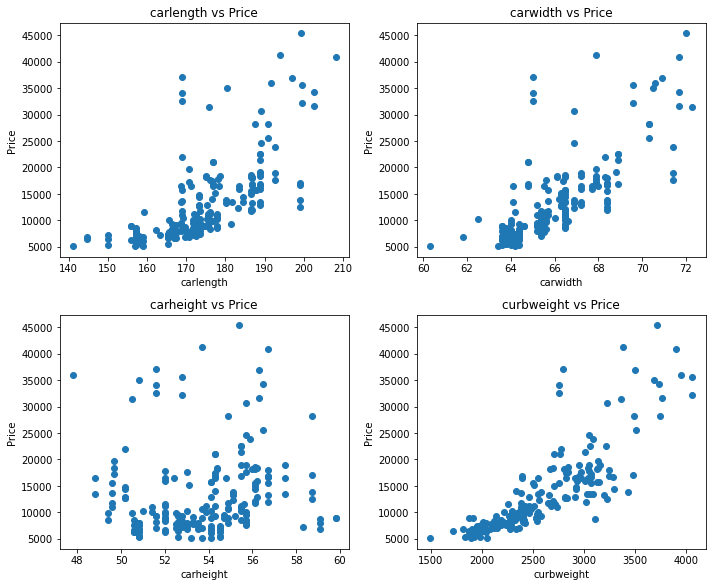

In [32]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inferences :
* carwidth, carlength and curbweight seems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.

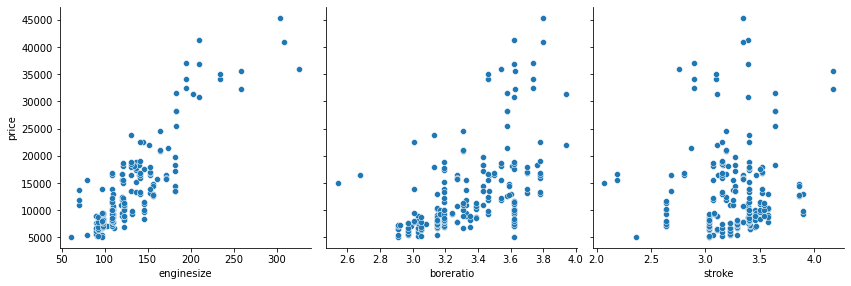

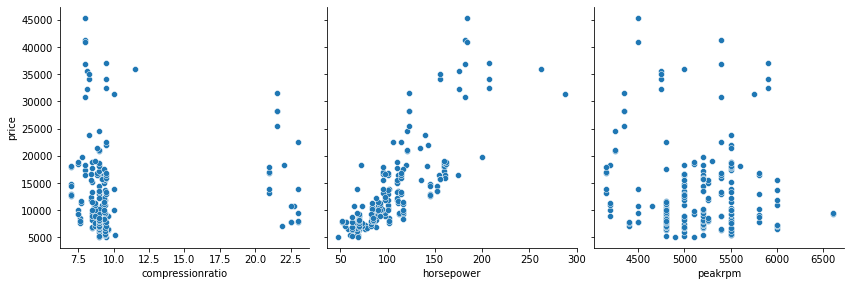

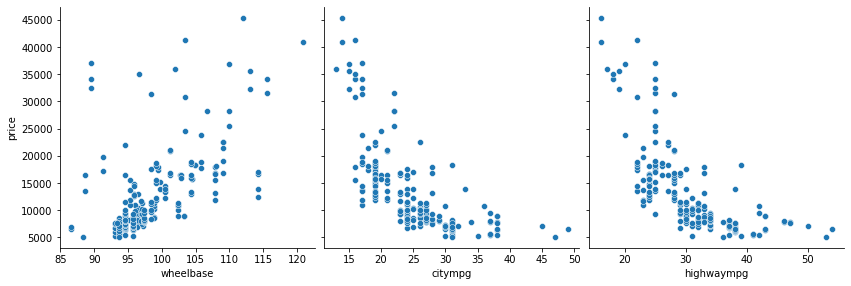

In [33]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Inference :
* enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
* citympg, highwaympg - seem to have a significant negative correlation with price.

In [34]:
cars.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


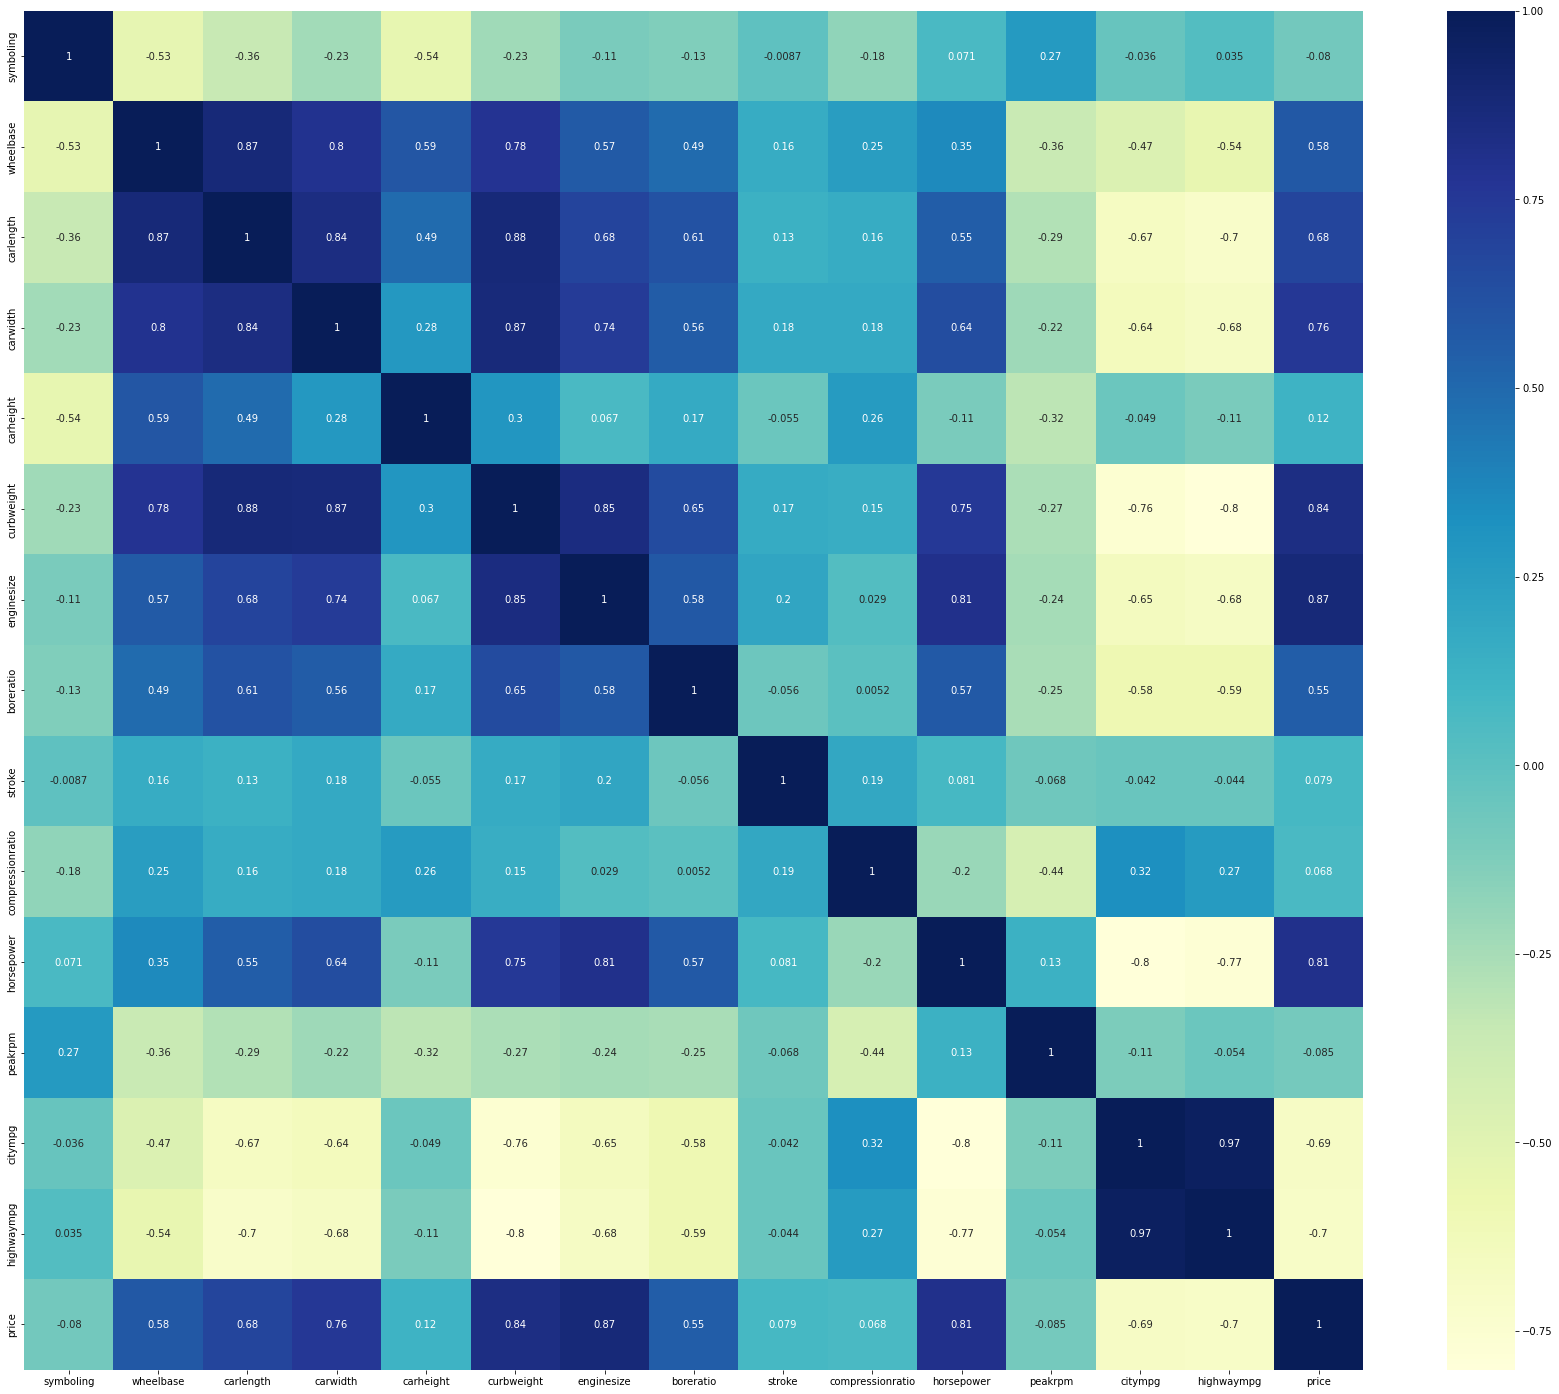

In [35]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

Heatmap including categorical variables as well by assigning a number to each category of each vairable.

In [36]:
# Get list of categorical variables
s = (cars.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [37]:
#Ordinal coding the categorical variables

from sklearn.preprocessing import OrdinalEncoder
cars_new = cars.copy()
ordinal_encoder = OrdinalEncoder()
cars_new[object_cols] = ordinal_encoder.fit_transform(cars_new[object_cols])


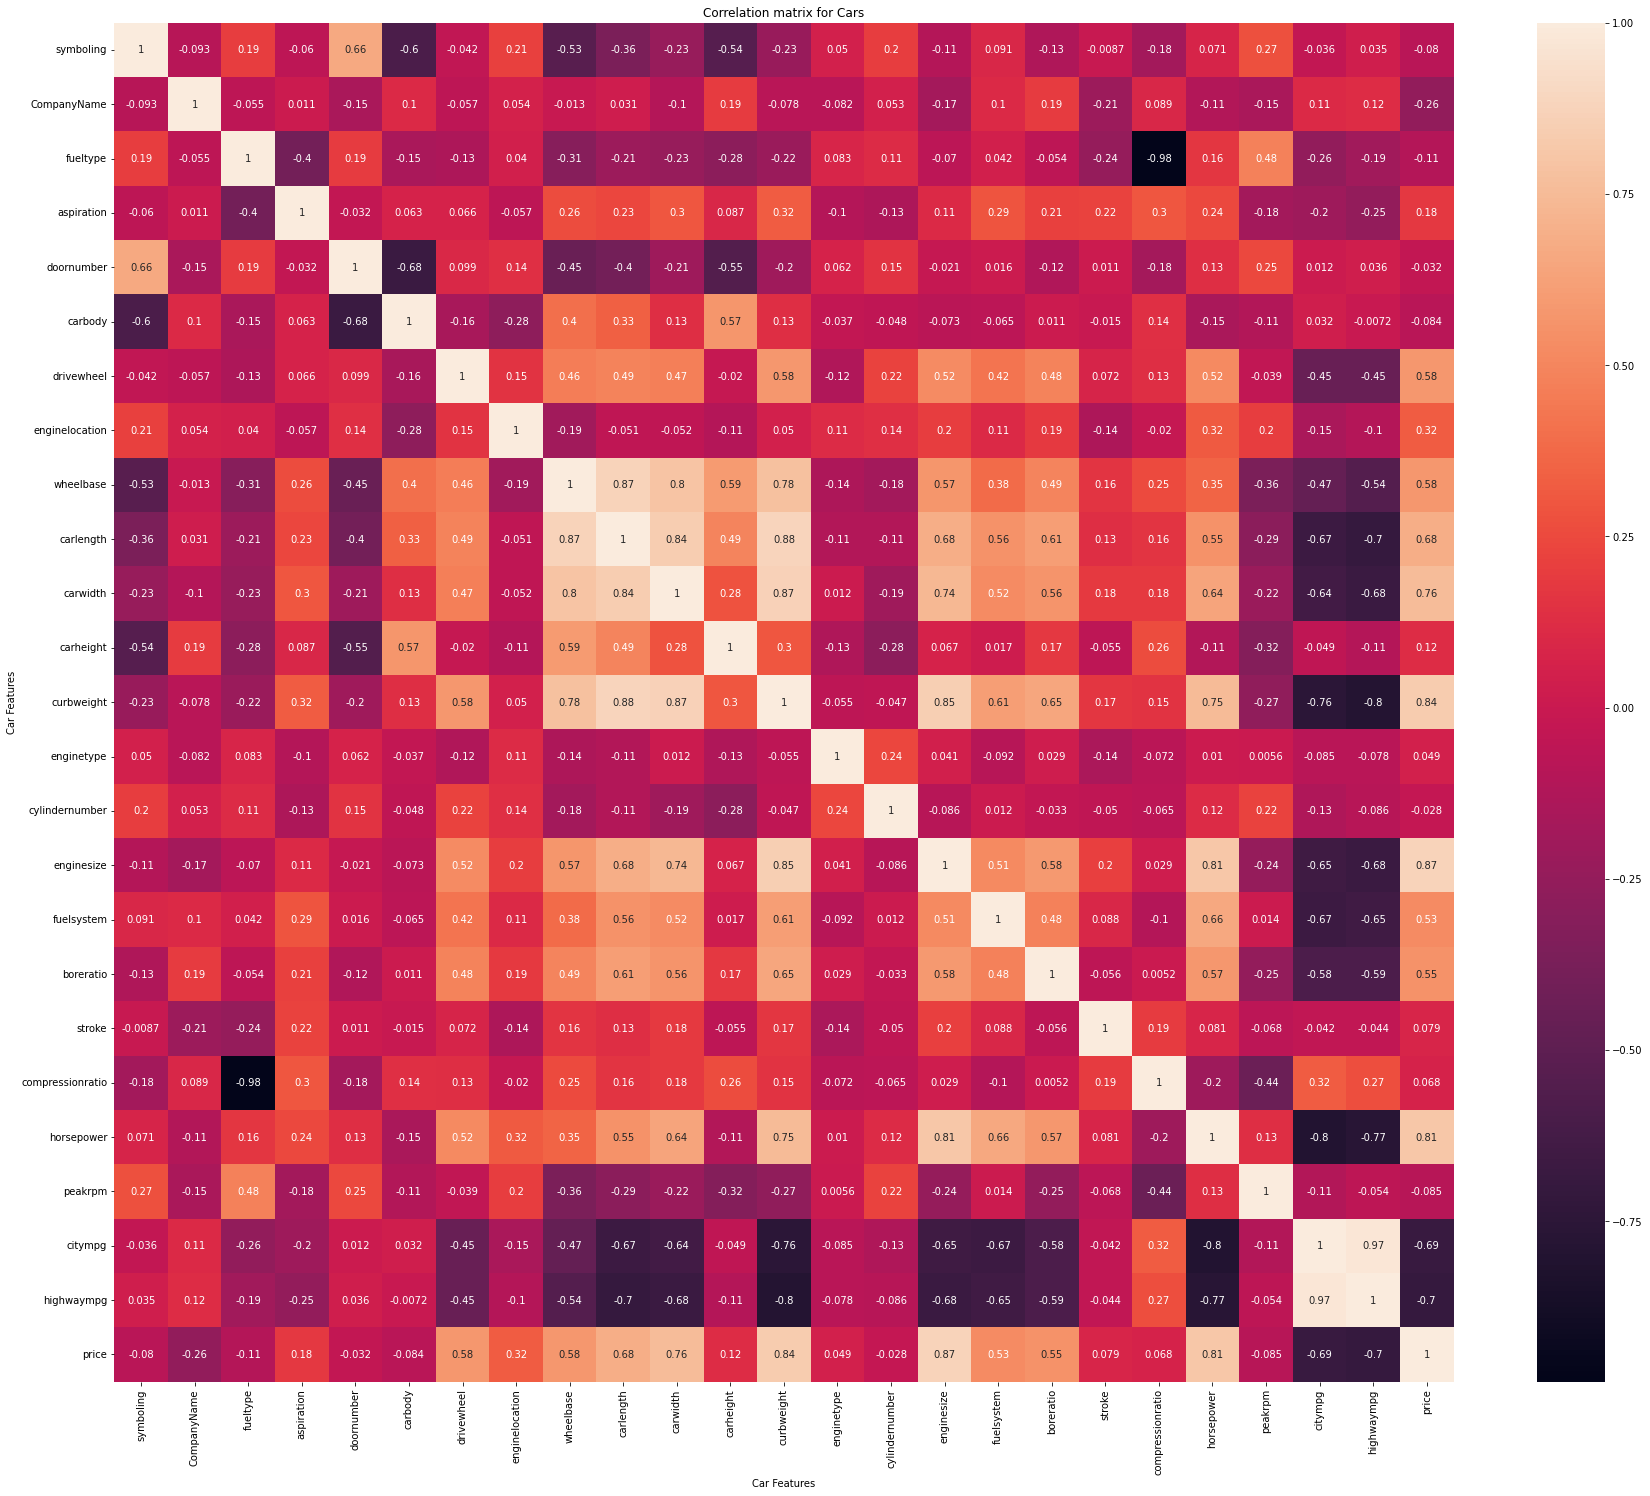

In [38]:
plt.figure(figsize = (30, 25))
correlation_matrix = cars_new.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Cars")

plt.xlabel("Car Features")

plt.ylabel("Car Features")

plt.show()


In [39]:
strong_feat=correlation_matrix[abs(correlation_matrix['price'])>0.5] 
print(strong_feat.price.sort_values())

highwaympg   -0.697599
citympg      -0.685751
fuelsystem    0.526823
boreratio     0.553173
wheelbase     0.577816
drivewheel    0.577992
carlength     0.682920
carwidth      0.759325
horsepower    0.808139
curbweight    0.835305
enginesize    0.874145
price         1.000000
Name: price, dtype: float64


**Inference**
Features having high positive correlation with price: fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize

Features having high negative correlation with price: highwaympg,citympg   

In [40]:
cars_new.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,0.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,1.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,1.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
cars_new.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

**CAR PRICE PREDICTION USING RANDOM FOREST CLASSIFIER****

In [42]:
#Dividing data into X and y variables
cars1=cars_new.copy()
y = cars1.pop('price')
X = cars1

In [43]:

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
price_pred = forest_model.predict(val_X)
mae=mean_absolute_error(val_y,price_pred)
print("percentage error : ",mae/(sum(val_y)/len(val_y))*100)
#f1= f1_score(val_y,price_pred)


percentage error :  12.681459988246552
